<a href="https://colab.research.google.com/github/davidsdatascience/Algorithm-Development/blob/master/gLVn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
from scipy.integrate import odeint
import itertools
import ast
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from numpy import *
import pylab as p
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as animation
import itertools
import ast
import pandas as pd

In this section of the model I look at the effect of having a number of competiting retailers for customers.

#https://en.wikipedia.org/wiki/Generalized_Lotka%E2%80%93Volterra_equation
#generalised Lotka-Volterra equations
#dx/dt = xf(x)
#f(x) = r + Ax
#r +ve producer
#r -ve predator or paracite 
#aij, aji -ve  direct competition
#aij, aji  +ve mutualism 
#aij -ve  and aji +ve predator prey 

## #aii are usually -ve  self limiting


In this section of the paper I look at the Lotka-Volterra competition model. This is based on a logistic growth curve rather than exponential growth.

dydx=x(1-x)

In this section of the paper I look at the Lotka-Volterra competition model. This is based on a logistic growth curve rather than exponential growth.Include intraction between the retailer and customer via the interaction matrix A

Predator-Prey Equations¶
Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let  x  and  y represent rabbit and fox populations, respectively. Then
dxdt=x(a−by) dydt=−y(c−dx)
 
Here  a ,  b ,  c  and  d  are parameters, which are assumed to be positive.

In [47]:
#Include intraction between the retailer and customer via the interaction matrix A
#dx1/dt=r1x1(1-(x1+a12x2))
#k => absorb into interaction matrix

N=10


P0=np.empty(N)
r=np.empty(N)
H = np.empty([N])

# data from gLVmodel excel - grocery marketshare
r=[0.014681091,0.045633814,0.142166691,0.220170343,0.341902891,0.589467078,0.001,0.660139209,0.372670613,0.001] # r is inherent  growth rate from web-glv
P0=[29, 16.7, 16.9, 11.1,4.9,5.9,5.2,3.5,2.7,2.2] #initial value of marketshare at t=0
P=np.empty([N])## marketshare
A = np.empty([N, N])


#A is the interaction matrix derived from web-glv see gLVmodel excel - grocery marketshare

A=np.matrix([[-0.000261131,	-0.000263615,	-0.000767489,	0.000865447,	0.000973085,	-0.0007256,	0.003765107,	-0.001468199,	-0.000473384,	-0.006263097],[-0.000448127,	-0.001587244,	-0.00163845,	0.002267011,	-0.002875188,	-0.00086675,	0.004609827,	0.002230098,	-0.001908067,	-0.005072557],[-0.002165193,	-0.000440709,	0,	-0.004276206,	-0.004938346,	0.001771555,	-0.010461319,	0.003274761,	-0.003916167,	0.01965198],[-0.000888101,	-0.00440019,	-0.003206023,	0,	-0.005787586,	-0.004698994,	-0.001789189,	0.002432293,	-0.000394209,	-0.004057076],[-0.004021085,	-5.68E-05,	-0.002183075,	-0.006691559,	-0.003725332,	-0.004566359,	-0.015140104,	-0.002665002,	0.00047719,	0.009361273],[-0.002716247,	-0.009880499,	-0.006321051,	-0.003038021,	-0.001599051,	-0.010493647,	-0.013503739,	-0.010646605,	0.001534814,	-0.0146291],[-0.002735017,	-0.00039006,	0.003208017,	-0.001947318,	-0.002786606,	0.004309099,	-0.00205074,	0.004003674,	-0.001281961,	0.018241281],[-0.007862654,	-0.005724647,	-0.003725139,	-0.010182607,	-0.002892208,	-0.00656507,	-0.01165742,	-0.010539184,	-0.004520211,	0.001449085],[-0.005244326,	-0.006065601,	0.001642421,	-0.005969264,	-0.014443858,	-0.006870365,	-0.013650285,	0.011698712,	0,	0.028473417],[0.000413682,	0.004860985,	-0.003120028,	0.00087073,	-0.00455283,	0.003916378,	-0.013320081,	0.005930274,	-0.001888977,	0]])




print(A)


#A=np.matrix([[1.0,0.0,0.0, 0.0],[0.0,1.0,0.0, 0.0],[0.0,0.0,1.0, 0.0],[0.0,0.0,0.0, 1.0]])




for i in range(N):
    for j in range(N):
        H[i]=(r[i]*P[i]-r[i]*P[i]*(1-P[i]-(A[i,j]*P[j])))


#print(H)
    

ts = np.linspace(0, 1200000, 100)
def dP_dt(P,t):
    return H

Ps = odeint(dP_dt, P0, ts)

[[-2.6113100e-04 -2.6361500e-04 -7.6748900e-04  8.6544700e-04
   9.7308500e-04 -7.2560000e-04  3.7651070e-03 -1.4681990e-03
  -4.7338400e-04 -6.2630970e-03]
 [-4.4812700e-04 -1.5872440e-03 -1.6384500e-03  2.2670110e-03
  -2.8751880e-03 -8.6675000e-04  4.6098270e-03  2.2300980e-03
  -1.9080670e-03 -5.0725570e-03]
 [-2.1651930e-03 -4.4070900e-04  0.0000000e+00 -4.2762060e-03
  -4.9383460e-03  1.7715550e-03 -1.0461319e-02  3.2747610e-03
  -3.9161670e-03  1.9651980e-02]
 [-8.8810100e-04 -4.4001900e-03 -3.2060230e-03  0.0000000e+00
  -5.7875860e-03 -4.6989940e-03 -1.7891890e-03  2.4322930e-03
  -3.9420900e-04 -4.0570760e-03]
 [-4.0210850e-03 -5.6800000e-05 -2.1830750e-03 -6.6915590e-03
  -3.7253320e-03 -4.5663590e-03 -1.5140104e-02 -2.6650020e-03
   4.7719000e-04  9.3612730e-03]
 [-2.7162470e-03 -9.8804990e-03 -6.3210510e-03 -3.0380210e-03
  -1.5990510e-03 -1.0493647e-02 -1.3503739e-02 -1.0646605e-02
   1.5348140e-03 -1.4629100e-02]
 [-2.7350170e-03 -3.9006000e-04  3.2080170e-03 -1.9473180e

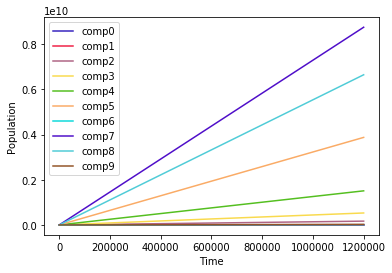

In [48]:

for i in range(N):
    plt.plot(ts, Ps[:,i], color=list(np.random.random(size=3) * 1), label="comp"  + str(i))




comp0=Ps[:,0]
comp1=Ps[:,1]
comp2=Ps[:,2]
comp3=Ps[:,3]
comp4=Ps[:,4]
comp5=Ps[:,5]
comp6=Ps[:,6]
comp7=Ps[:,7]
comp8=Ps[:,8]
comp9=Ps[:,9]
color = list(np.random.random(size=3) * 256)


#plt.plot(ts, comp0, color=list(np.random.random(size=3) * 1), label="comp0")
#plt.plot(ts, comp1, color=list(np.random.random(size=3) * 1), label="comp1")
#plt.plot(ts, comp2, color=list(np.random.random(size=3) * 1), label="comp2")
#plt.plot(ts, comp3, color=list(np.random.random(size=3) * 1), label="comp3")
#plt.plot(ts, comp4, color=list(np.random.random(size=3) * 1), label="comp4")
#plt.plot(ts, comp5, color=list(np.random.random(size=3) * 1), label="comp5")
#plt.plot(ts, comp6, color=list(np.random.random(size=3) * 1), label="comp6")
#plt.plot(ts, comp7, color=list(np.random.random(size=3) * 1), label="comp7")
#plt.plot(ts, comp8, color=list(np.random.random(size=3) * 1), label="comp8")
#plt.plot(ts, comp9, color=list(np.random.random(size=3) * 1), label="comp9")



plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

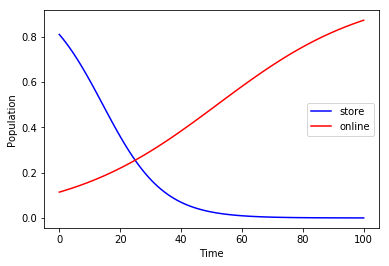

In [43]:
#Progress of Theoretical Physics, Yol. 96, No.1, July 1996
#Seasonal Isochronic Forcing of Lotka Volterra Equations
#John VANDERMEER 
#Include intraction between the retailer and customer via the interaction matrix A
# department store marketshare =81%
# online retailer market share = 11.4
# growth rate of department store share = -10%
# growth rate of online retailers = 4.1%

#see https://sites.duke.edu/djepapers/files/2016/08/jones.pdf
#https://ir.debenhams.com/static-files/0fd324ce-5cb4-4a35-8429-11ac949bf908
#https://ir.debenhams.com/sites/g/files/knoqqb38816/themes/site/nir_pid1372/IAR/assets/downloads/Financial%20Statements.pdf
#dP/dt=aNP-mP
#dN/dt= r[(1 +sinwt)/2]N - bN2- eNP


k=[1.0,1.0]# carrying capacity
r=[-0.1,0.04]# r is inherent per-capita growth rate
P0=[0.81, 0.114]#initial value of population 1 and population 2 at t=0
A=np.matrix([[-0.03,0.0],[0.0,0.030]])#interaction matrix




def dP_dt(P,t):
    return [r[0]*P[0]*(1 - P[0]-A[0,0]*P[1]/k[0]), r[1]*P[1]*(1-P[1]-A[1,1]*P[0]/k[1])]

ts = np.linspace(0, 100, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]


plt.plot(ts, customer, color='Blue', label="store")
plt.plot(ts, retailer, color='Red', label="online")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

[[-2.6113100e-04 -2.6361500e-04 -7.6748900e-04  8.6544700e-04
   9.7308500e-04 -7.2560000e-04  3.7651070e-03 -1.4681990e-03
  -4.7338400e-04 -6.2630970e-03]
 [-4.4812700e-04 -1.5872440e-03 -1.6384500e-03  2.2670110e-03
  -2.8751880e-03 -8.6675000e-04  4.6098270e-03  2.2300980e-03
  -1.9080670e-03 -5.0725570e-03]
 [-2.1651930e-03 -4.4070900e-04  0.0000000e+00 -4.2762060e-03
  -4.9383460e-03  1.7715550e-03 -1.0461319e-02  3.2747610e-03
  -3.9161670e-03  1.9651980e-02]
 [-8.8810100e-04 -4.4001900e-03 -3.2060230e-03  0.0000000e+00
  -5.7875860e-03 -4.6989940e-03 -1.7891890e-03  2.4322930e-03
  -3.9420900e-04 -4.0570760e-03]
 [-4.0210850e-03 -5.6800000e-05 -2.1830750e-03 -6.6915590e-03
  -3.7253320e-03 -4.5663590e-03 -1.5140104e-02 -2.6650020e-03
   4.7719000e-04  9.3612730e-03]
 [-2.7162470e-03 -9.8804990e-03 -6.3210510e-03 -3.0380210e-03
  -1.5990510e-03 -1.0493647e-02 -1.3503739e-02 -1.0646605e-02
   1.5348140e-03 -1.4629100e-02]
 [-2.7350170e-03 -3.9006000e-04  3.2080170e-03 -1.9473180e

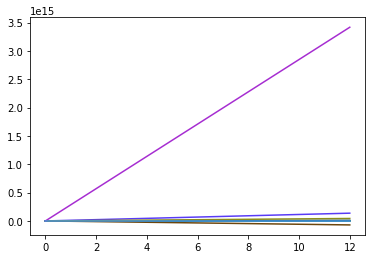

In [50]:
#Include intraction between the retailer and customer via the interaction matrix A
#dx1/dt=r1x1(1-(x1+a12x2))
#k => absorb into interaction matrix

N=10


P0=np.empty(N)
r=np.empty(N)
H = np.empty([N])

# data from gLVmodel excel - grocery marketshare
r=[0.014681091,0.045633814,0.142166691,0.220170343,0.341902891,0.589467078,0.001,0.660139209,0.372670613,0.001] # r is inherent  growth rate from web-glv
P0=[29, 16.7, 16.9, 11.1,4.9,5.9,5.2,3.5,2.7,2.2] #initial value of marketshare at t=0
P=np.empty([N])## marketshare
A = np.empty([N, N])


#A is the interaction matrix derived from web-glv see gLVmodel excel - grocery marketshare

A=np.matrix([[-0.000261131,	-0.000263615,	-0.000767489,	0.000865447,	0.000973085,	-0.0007256,	0.003765107,	-0.001468199,	-0.000473384,	-0.006263097],[-0.000448127,	-0.001587244,	-0.00163845,	0.002267011,	-0.002875188,	-0.00086675,	0.004609827,	0.002230098,	-0.001908067,	-0.005072557],[-0.002165193,	-0.000440709,	0,	-0.004276206,	-0.004938346,	0.001771555,	-0.010461319,	0.003274761,	-0.003916167,	0.01965198],[-0.000888101,	-0.00440019,	-0.003206023,	0,	-0.005787586,	-0.004698994,	-0.001789189,	0.002432293,	-0.000394209,	-0.004057076],[-0.004021085,	-5.68E-05,	-0.002183075,	-0.006691559,	-0.003725332,	-0.004566359,	-0.015140104,	-0.002665002,	0.00047719,	0.009361273],[-0.002716247,	-0.009880499,	-0.006321051,	-0.003038021,	-0.001599051,	-0.010493647,	-0.013503739,	-0.010646605,	0.001534814,	-0.0146291],[-0.002735017,	-0.00039006,	0.003208017,	-0.001947318,	-0.002786606,	0.004309099,	-0.00205074,	0.004003674,	-0.001281961,	0.018241281],[-0.007862654,	-0.005724647,	-0.003725139,	-0.010182607,	-0.002892208,	-0.00656507,	-0.01165742,	-0.010539184,	-0.004520211,	0.001449085],[-0.005244326,	-0.006065601,	0.001642421,	-0.005969264,	-0.014443858,	-0.006870365,	-0.013650285,	0.011698712,	0,	0.028473417],[0.000413682,	0.004860985,	-0.003120028,	0.00087073,	-0.00455283,	0.003916378,	-0.013320081,	0.005930274,	-0.001888977,	0]])




print(A)


#A=np.matrix([[1.0,0.0,0.0, 0.0],[0.0,1.0,0.0, 0.0],[0.0,0.0,1.0, 0.0],[0.0,0.0,0.0, 1.0]])




for i in range(N):
    for j in range(N):
        H[i]=P[i]*(r[i]+(A[i,j]*P[i]))


#print(H)
    

ts = np.linspace(0, 12, 100)
def dP_dt(P,t):
    return H

Ps = odeint(dP_dt, P0, ts)

for i in range(N):
    plt.plot(ts, Ps[:,i], color=list(np.random.random(size=3) * 1), label="comp"  + str(i))




comp0=Ps[:,0]
comp1=Ps[:,1]
comp2=Ps[:,2]
comp3=Ps[:,3]
comp4=Ps[:,4]
comp5=Ps[:,5]
comp6=Ps[:,6]
comp7=Ps[:,7]
comp8=Ps[:,8]
comp9=Ps[:,9]
color = list(np.random.random(size=3) * 256)








